# **Prédiction de l'insuffisance cardiaque**
Elaboré par:Maram Assili

matiere:Data Mining

Groupe:C

# **Introduction**

Les maladies cardiovasculaires sont la principale cause de décès à l'échelle mondiale, représentant près d'un tiers de toutes les morts. L'insuffisance cardiaque, souvent liée à ces maladies, nécessite une détection précoce pour une gestion efficace. En utilisant des techniques de modélisation statistique, nous visons à créer des outils permettant d'identifier les personnes à risque, offrant ainsi la possibilité d'une intervention précoce et d'une meilleure prise en charge médicale.

###1. importer les bibliothèques nécessaires

In [103]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
pd.options.display.float_format = '{:.2f}'.format
import warnings
warnings.filterwarnings('ignore')

In [104]:
from google.colab import files
uploaded = files.upload()


Saving heart_failure_clinical_records_dataset.csv to heart_failure_clinical_records_dataset (2).csv


In [105]:
import pandas as pd
data = pd.read_csv("heart_failure_clinical_records_dataset.csv")
data.head(10)


,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,DEATH_EVENT
0,75.00,0,582,0,20,1,265000.00,1.90,130,1,0,4,1
1,55.00,0,7861,0,38,0,263358.03,1.10,136,1,0,6,1
2,65.00,0,146,0,20,0,162000.00,1.30,129,1,1,7,1
3,50.00,1,111,0,20,0,210000.00,1.90,137,1,0,7,1
4,65.00,1,160,1,20,0,327000.00,2.70,116,0,0,8,1
5,90.00,1,47,0,40,1,204000.00,2.10,132,1,1,8,1
6,75.00,1,246,0,15,0,127000.00,1.20,137,1,0,10,1
7,60.00,1,315,1,60,0,454000.00,1.10,131,1,1,10,1
8,65.00,0,157,0,65,0,263358.03,1.50,138,0,0,10,1
9,80.00,1,123,0,35,1,388000.00,9.40,133,1,1,10,1


###2. Préparation et nettoyage des données

In [106]:
print('le nombre des lignes est', len(data.index))
print('le nombre des variables est', len(data.columns))


le nombre des lignes est 299
le nombre des variables est 13


La base de données contient des observations de **13 variables** pour **299 patients**.

1.  **Age**: Âge du patient en années
2. **Anaemia**: Diminution des globules rouges ou de l'hémoglobine (0 : Réduit ou 1 : Normal)
3. **creatinine_phosphokinase**: Niveau de l'enzyme CPK dans le sang (mcg/L)
4. **Diabetes**: Si le patient est diabétique (0 : Non ou 1 : Oui)
5. **ejection_fraction**: Pourcentage de sang quittant le cœur à chaque contraction (pourcentage)
6. **high_blood_pressure**: Si le patient est hypertendu (0 : Non ou 1 : Oui)
7. **platelets**: Plaquettes dans le sang (kiloplaquettes/mL)
8. **serum_creatinine**: Niveau de créatinine sérique dans le sang (mg/dL)
9. **serum_sodium**: Niveau de sodium sérique dans le sang (mEq/L)
10. **sex**: Sexe biologique du patient (0 : Femme ou 1 : Homme)
11. **smoking**: Si le patient est fumeur (0 : Non ou 1 : Oui)
12. **time**: Période de suivi en jours
13. **death_event(TARGET)**: Si le patient a survécu jusqu'à la fin de la période de suivi (0 : Non ou 1 : Oui)


In [107]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 299 entries, 0 to 298
Data columns (total 13 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   age                       299 non-null    float64
 1   anaemia                   299 non-null    int64  
 2   creatinine_phosphokinase  299 non-null    int64  
 3   diabetes                  299 non-null    int64  
 4   ejection_fraction         299 non-null    int64  
 5   high_blood_pressure       299 non-null    int64  
 6   platelets                 299 non-null    float64
 7   serum_creatinine          299 non-null    float64
 8   serum_sodium              299 non-null    int64  
 9   sex                       299 non-null    int64  
 10  smoking                   299 non-null    int64  
 11  time                      299 non-null    int64  
 12  DEATH_EVENT               299 non-null    int64  
dtypes: float64(3), int64(10)
memory usage: 30.5 KB


In [108]:
data.isnull().sum()

age                         0
anaemia                     0
creatinine_phosphokinase    0
diabetes                    0
ejection_fraction           0
high_blood_pressure         0
platelets                   0
serum_creatinine            0
serum_sodium                0
sex                         0
smoking                     0
time                        0
DEATH_EVENT                 0
dtype: int64

--> Aucune des colonnes ne contient de valeurs nulles. Les types de données incluent des valeurs de type float64 pour certaines colonnes (âge, plaquettes, créatinine sérique) et des valeurs de type int64 pour les autres colonnes (anaémie, diabète, fraction d'éjection,...)

In [109]:
data.describe().T


,count,mean,std,min,25%,50%,75%,max
age,299.00,60.83,11.89,40.00,51.00,60.00,70.00,95.00
anaemia,299.00,0.43,0.50,0.00,0.00,0.00,1.00,1.00
creatinine_phosphokinase,299.00,581.84,970.29,23.00,116.50,250.00,582.00,7861.00
diabetes,299.00,0.42,0.49,0.00,0.00,0.00,1.00,1.00
ejection_fraction,299.00,38.08,11.83,14.00,30.00,38.00,45.00,80.00
high_blood_pressure,299.00,0.35,0.48,0.00,0.00,0.00,1.00,1.00
platelets,299.00,263358.03,97804.24,25100.00,212500.00,262000.00,303500.00,850000.00
serum_creatinine,299.00,1.39,1.03,0.50,0.90,1.10,1.40,9.40
serum_sodium,299.00,136.63,4.41,113.00,134.00,137.00,140.00,148.00
sex,299.00,0.65,0.48,0.00,0.00,1.00,1.00,1.00


**Les valeurs moyennes de toutes les caractéristiques pour les cas d'ÉVÉNEMENTS DE DÉCÈS et d'ABSENCE D'ÉVÉNEMENT DE DÉCÈS.**

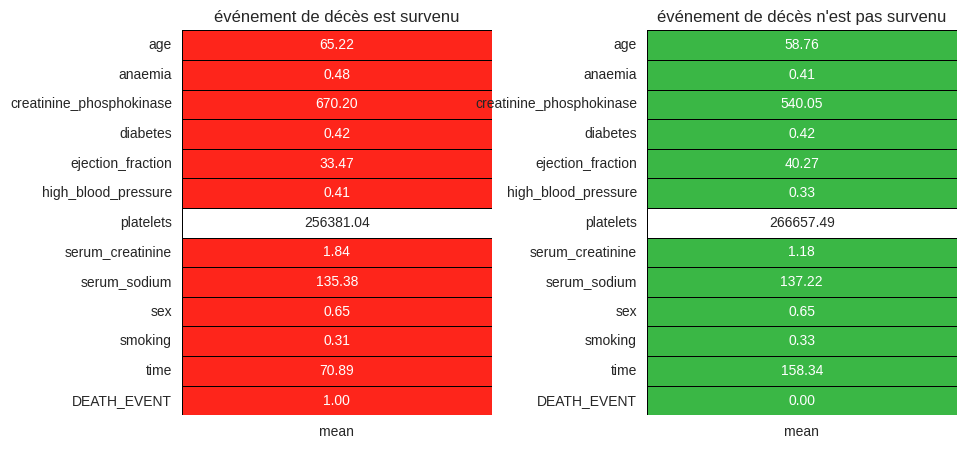

In [110]:
import matplotlib.pyplot as plt
import seaborn as sns

# Calcul des statistiques descriptives pour les cas où un événement de décès est survenu
yes = data[data['DEATH_EVENT'] == 1].describe().T

# Calcul des statistiques descriptives pour les cas où aucun événement de décès n'est survenu
no = data[data['DEATH_EVENT'] == 0].describe().T

# Création de la figure et des sous-graphiques
fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(10, 5))

# Heatmap pour les cas où un événement de décès est survenu
plt.subplot(1, 2, 1)
sns.heatmap(yes[['mean']], annot=True, cmap=['#FE251B', '#FFFFFF'], linewidths=0.4, linecolor='black', cbar=False, fmt='.2f')
plt.title('événement de décès est survenu')

# Heatmap pour les cas où aucun événement de décès n'est survenu
plt.subplot(1, 2, 2)
sns.heatmap(no[['mean']], annot=True, cmap=['#3AB745', '#FFFFFF'], linewidths=0.4, linecolor='black', cbar=False, fmt='.2f')
plt.title('événement de décès n\'est pas survenu')

# Ajustement des espacements entre les sous-graphiques
plt.subplots_adjust(wspace=0.5)

# Affichage de la figure
plt.show()


### les caractéristiques en numériques et catégoriques

In [111]:
data.nunique()

age                          47
anaemia                       2
creatinine_phosphokinase    208
diabetes                      2
ejection_fraction            17
high_blood_pressure           2
platelets                   176
serum_creatinine             40
serum_sodium                 27
sex                           2
smoking                       2
time                        148
DEATH_EVENT                   2
dtype: int64

On a choisit les variables qui ont au moins 6 elements uniques comme des variables quantitatives et les autres sont considérées comme des caractéristiques numériques.

In [112]:
col = list(data.columns)
les_variables_qualitatives = []
les_variables_quantitatives = []
for i in col:
    if len(data[i].unique()) > 6:
        les_variables_quantitatives.append(i)
    else:
        les_variables_qualitatives.append(i)

print(' les variables qualitatives :', les_variables_qualitatives)
print(' les variables quantitatives :',les_variables_quantitatives)

 les variables qualitatives : ['anaemia', 'diabetes', 'high_blood_pressure', 'sex', 'smoking', 'DEATH_EVENT']
 les variables quantitatives : ['age', 'creatinine_phosphokinase', 'ejection_fraction', 'platelets', 'serum_creatinine', 'serum_sodium', 'time']


j'ai transformé les variables age et platelets du float en int et j'ai crée une copie de la base

In [113]:
data['age'] = data['age'].astype(int)
data['platelets'] = data['platelets'].astype(int)
df = data.copy(deep = True)

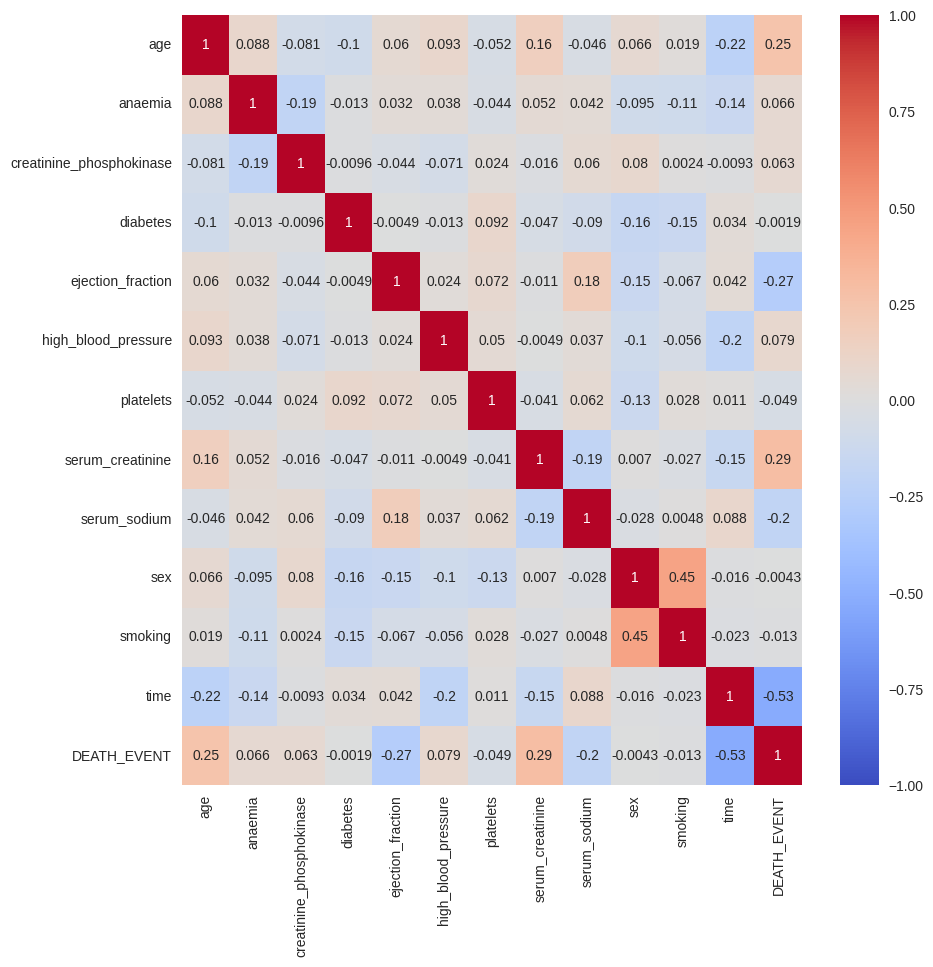

In [114]:
corr = df.corr()
ax, fig = plt.subplots(figsize=(10,10))
sns.heatmap(corr, vmin=-1, cmap='coolwarm', annot=True)
plt.show()

**Visualisation de la variable target**

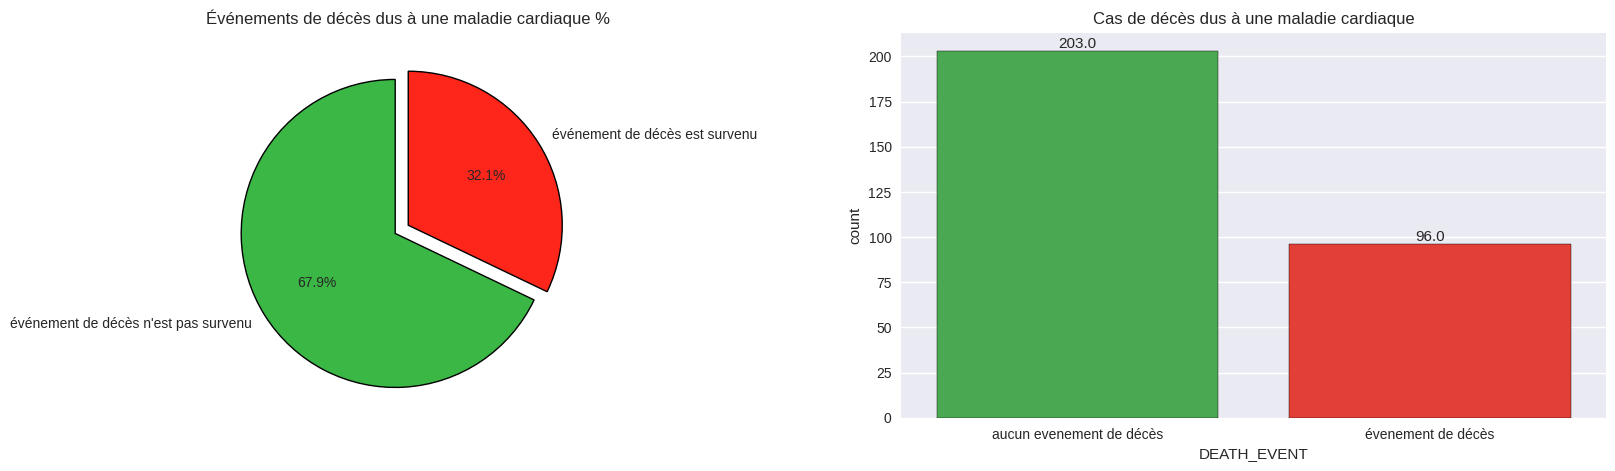

In [115]:
l = list(df['DEATH_EVENT'].value_counts())
circle = [l[0] / sum(l) * 100,l[1] / sum(l) * 100]
colors = ['#3AB745','#FE251B']
fig = plt.subplots(nrows = 1,ncols = 2,figsize = (20,5))
plt.subplot(1,2,1)
plt.pie(circle,labels = ['événement de décès n\'est pas survenu','événement de décès est survenu'],autopct='%1.1f%%',startangle = 90,explode = (0.1,0),colors = colors,
       wedgeprops = {'edgecolor' : 'black','linewidth': 1,'antialiased' : True})
plt.title('Événements de décès dus à une maladie cardiaque %');
plt.subplot(1,2,2)
ax = sns.countplot(x='DEATH_EVENT', data=df, palette=colors, edgecolor='black')
for rect in ax.patches:
    ax.text(rect.get_x() + rect.get_width() / 2, rect.get_height() + 2, rect.get_height(), horizontalalignment='center', fontsize = 11)
ax.set_xticklabels(['aucun evenement de décès','évenement de décès'])
plt.title('Cas de décès dus à une maladie cardiaque');
plt.show()

**-▶**  La base de données est déséquilibré avec très peu de points de données (299) !En raison de cela, les prédictions seront biaisées en faveur des cas sans événement de décès, donc il serait judicieux de recourir à des méthodes d'équilibrage des données pour atténuer le déséquilibre entre les 2 classes.

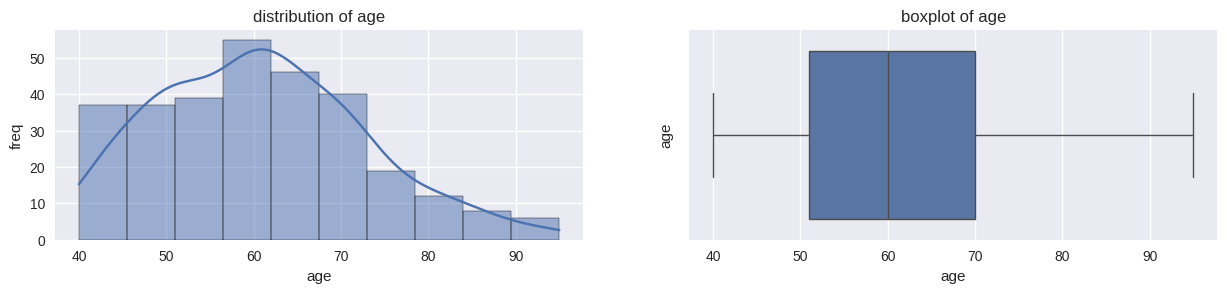

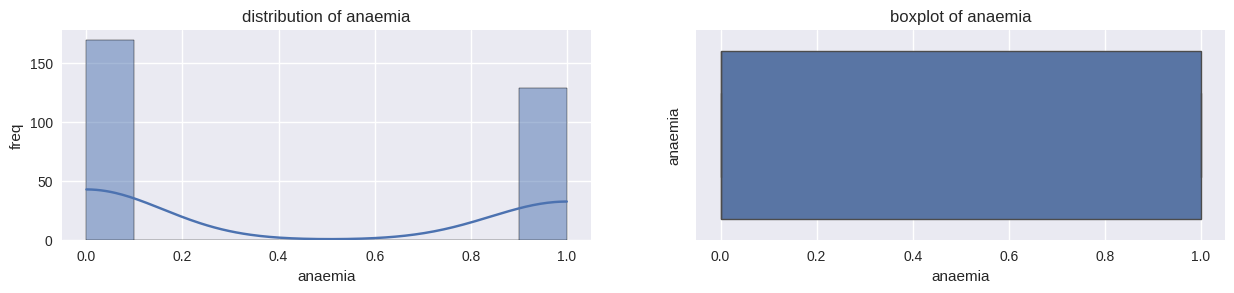

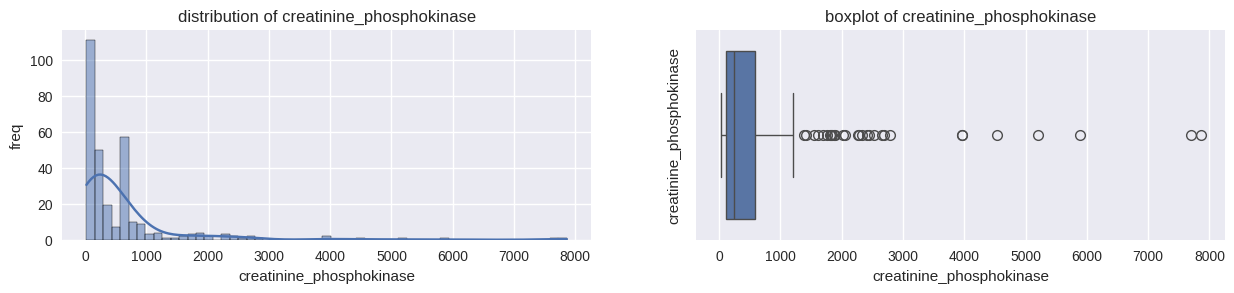

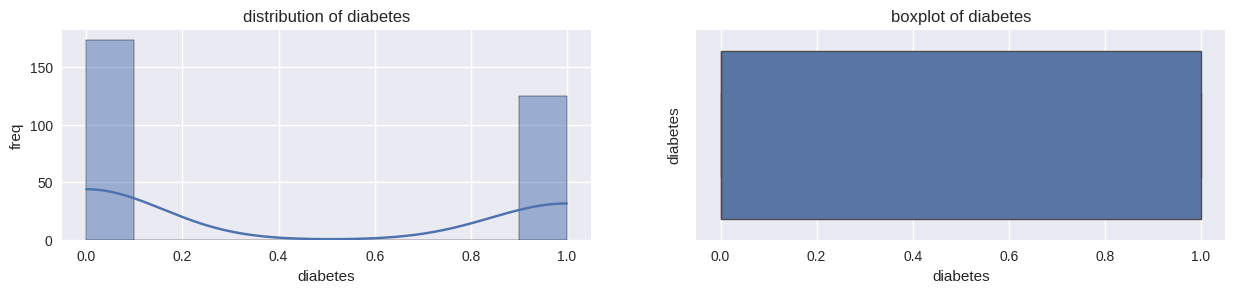

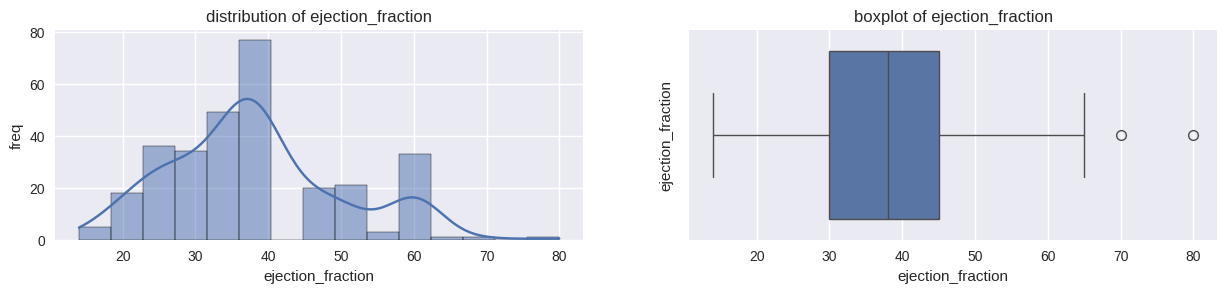

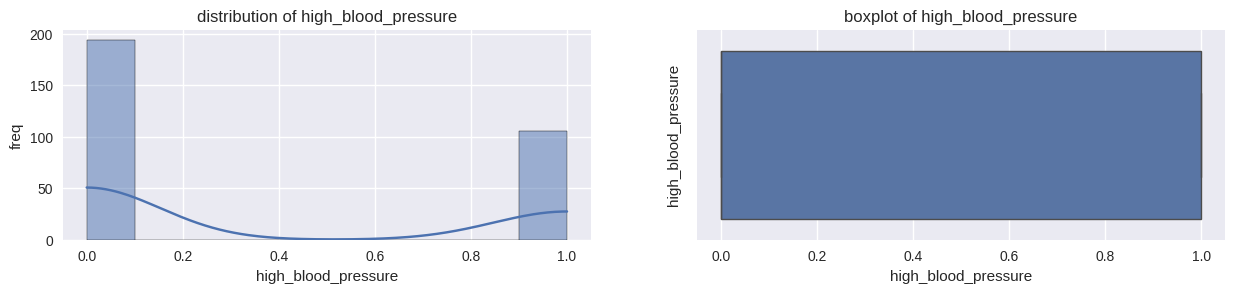

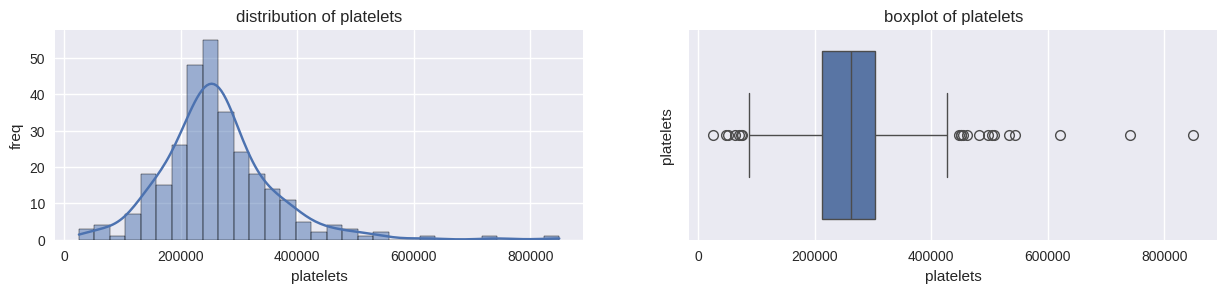

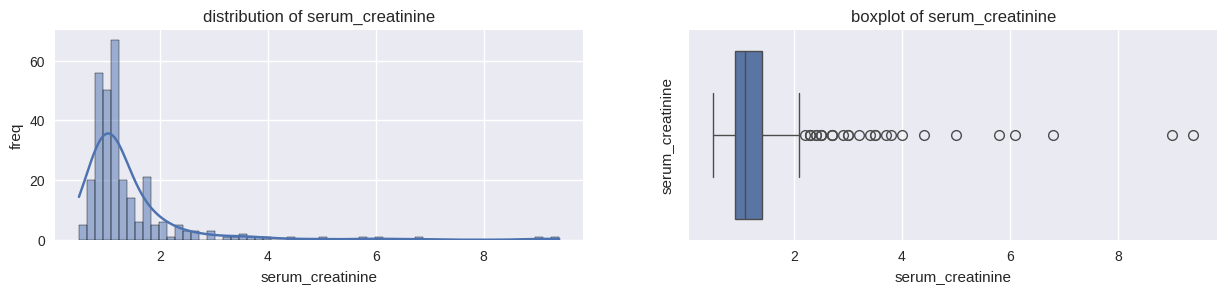

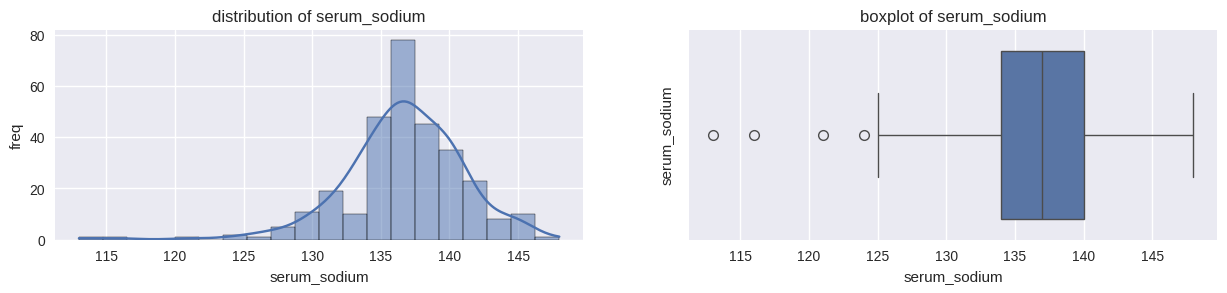

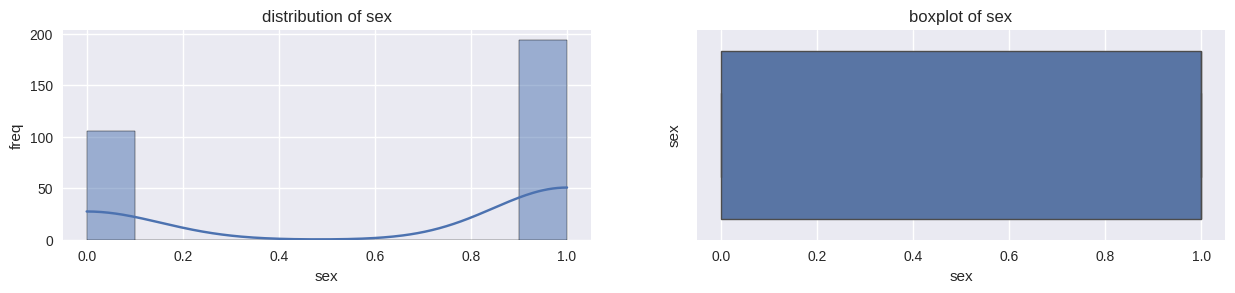

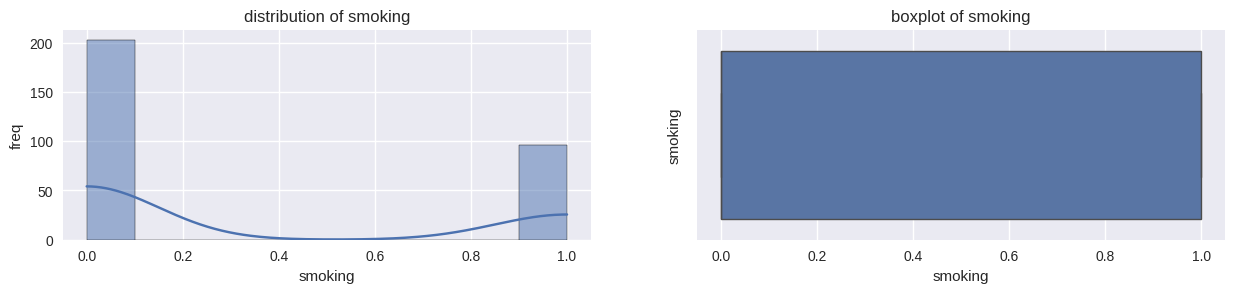

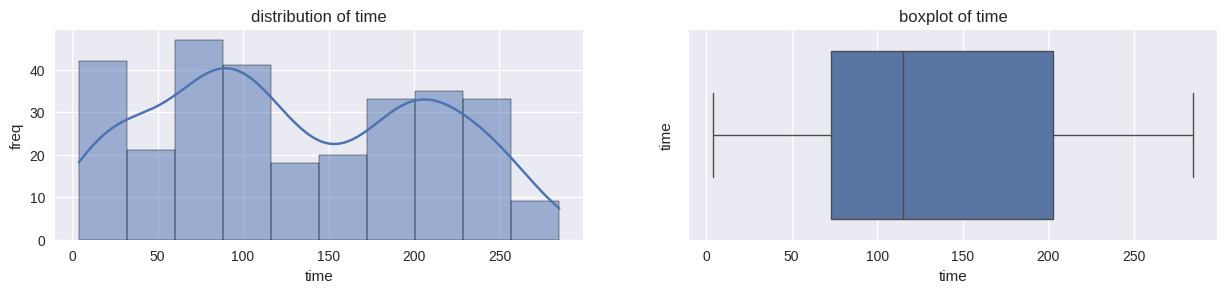

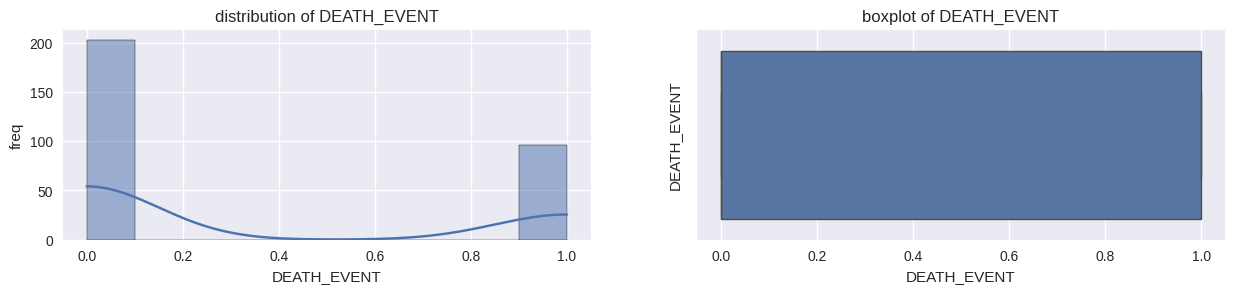

In [116]:
plt.style.use("seaborn")
for column in df.columns:
    if df[column].dtype!="object":
        plt.figure(figsize=(15,6))
        plt.subplot(2,2,1)
        sns.histplot(data=df,x=column,kde=True)
        plt.ylabel("freq")
        plt.xlabel(column)
        plt.title(f"distribution of {column}")
        plt.subplot(2,2,2)
        sns.boxplot(data=df,x=column)
        plt.ylabel(column)
        plt.title(f"boxplot of {column}")
        plt.show()

**interprétation**

-Age, Creatinine_Phosphokinase, Ejection_Fraction et Serum_creatinine ont une distribution des données de type droit ou positivement inclinée, c'est à dire :

* Age : Les âges sont majoritairement jeunes.
* Creatinine Phosphokinase : Les valeurs sont principalement basses.
* Ejection Fraction: La plupart des fractions d'éjection sont normales, mais il peut y avoir quelques cas avec une fraction d'éjection plus faible.
* Serum Creatinine : Les concentrations sont principalement basses.
* Platelets : La distribution est équilibrée.
* Serum Sodium : La distribution est équilibrée.
* Time : Présente des irrégularités, typiques d'une analyse de séries temporelles.

-
Pour la créatinine phosphokinase, les valeurs de 0 à 500 et les plaquettes dans la plage de 2x10^5 à 3x10^5 détectent plus de cas d'insuffisance cardiaque.

-De même, les niveaux de créatinine sérique entre 1 et 2 et les valeurs de la variable "time" de 0 à 100 mettent en évidence davantage de cas d'insuffisance cardiaque.

-Les valeurs de fraction d'éjection comprises entre 30 et 45 entraînent des cas d'événements de décès.

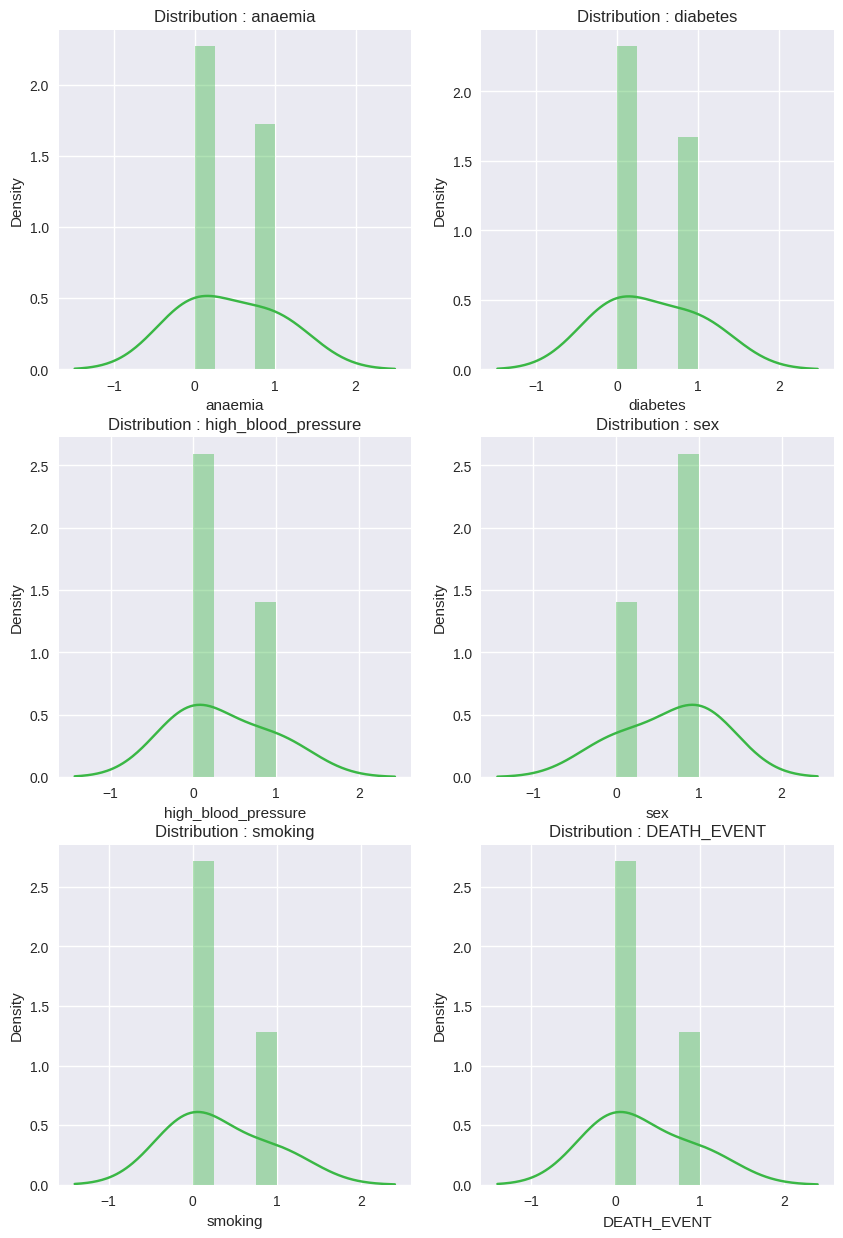

In [117]:
fig, ax = plt.subplots(nrows = 3,ncols = 2,figsize = (10,15))
for i in range(len(les_variables_qualitatives)):

    plt.subplot(3,2,i+1)
    sns.distplot(df[les_variables_qualitatives[i]],kde_kws = {'bw' : 1},color = colors[0]);
    title = 'Distribution : ' + les_variables_qualitatives[i]
    plt.title(title)


**interprétation**

-Les variables anaemia, diabetes, high_blood_pressure, sex, smoking et DEATH_EVENT suivent une distribution normale.

**Sélection de caractéristiques pour les variables quantitatives (utilisation de f_classif) :**

In [118]:
from sklearn.feature_selection import SelectKBest, f_classif
y = df['DEATH_EVENT']
# Sélection des caractéristiques quantitatives uniquement
X_quantitative = df[['age', 'creatinine_phosphokinase', 'ejection_fraction', 'platelets', 'serum_creatinine', 'serum_sodium', 'time']]

selector_quantitative = SelectKBest(score_func=f_classif, k='all')
X_selected_quantitative = selector_quantitative.fit_transform(X_quantitative,y)

scores_quantitative = list(selector_quantitative.scores_)
col_scores_quantitative = [(col, round(score, 2)) for col, score in zip(X_quantitative.columns, scores_quantitative)]
col_scores_quantitative = sorted(col_scores_quantitative, key=lambda x: x[1], reverse=True)
print("Scores des caractéristiques quantitatives :", col_scores_quantitative)


Scores des caractéristiques quantitatives : [('time', 114.18), ('serum_creatinine', 28.16), ('ejection_fraction', 23.09), ('age', 20.41), ('serum_sodium', 11.77), ('creatinine_phosphokinase', 1.17), ('platelets', 0.72)]


Cela suggère que les variables telles que le temps écoulé depuis le début de l'étude, le niveau de créatinine sérique ,l'age et la fraction d'éjection du sang sont des facteurs plus influents dans la prédiction de l'événement de décès par rapport aux autres caractéristiques.

Donc on retient les 4 premières variables.



**Sélection de caractéristiques pour les variables qualitatives (utilisation de chi2) :**

In [119]:
from sklearn.feature_selection import SelectKBest, chi2

# Sélection des caractéristiques qualitatives uniquement
X_qualitative = df[['anaemia', 'diabetes', 'high_blood_pressure', 'sex', 'smoking']]


selector_qualitative = SelectKBest(score_func=chi2, k='all')
X_selected_qualitative = selector_qualitative.fit_transform(X_qualitative, y)

scores_qualitative = list(selector_qualitative.scores_)
col_scores_qualitative = [(col, round(score, 2)) for col, score in zip(X_qualitative.columns, scores_qualitative)]
col_scores_qualitative = sorted(col_scores_qualitative, key=lambda x: x[1], reverse=True)
print("Scores des caractéristiques qualitatives :", col_scores_qualitative)


Scores des caractéristiques qualitatives : [('high_blood_pressure', 1.22), ('anaemia', 0.75), ('smoking', 0.03), ('diabetes', 0.0), ('sex', 0.0)]


Cela suggère que parmi les caractéristiques qualitatives que vous avez sélectionnées, la pression artérielle élevée (high_blood_pressure) et l'anémie (anaemia) sont les plus significatives pour prédire l'événement de décès.

Donc on retient les 2 premières variables.

In [120]:
from imblearn.over_sampling import SMOTENC
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.impute import SimpleImputer

# Sélection des caractéristiques
X = df[['age','time', 'serum_creatinine', 'ejection_fraction','high_blood_pressure','anaemia' ]]

# Séparation de la variable cible
y = df['DEATH_EVENT']

# Division des données en ensembles d'entraînement et de test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Gestion des valeurs manquantes
imputer = SimpleImputer(strategy='mean')
X_train = imputer.fit_transform(X_train)
X_test = imputer.transform(X_test)

# Standardisation des caractéristiques
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Identification des indices des variables catégorielles
categorical_features_indices = [4, 5]

# Sur-échantillonnage avec SMOTENC sur l'ensemble d'entraînement
smote_nc = SMOTENC(categorical_features=categorical_features_indices, random_state=42)
X_train_resampled, y_train_resampled = smote_nc.fit_resample(X_train, y_train)

# Vérification des nouvelles tailles des ensembles d'entraînement et de test
print("Taille de l'ensemble d'entraînement après SMOTENC:", X_train_resampled.shape[0])
print("Taille de l'ensemble de test:", X_test.shape[0])


Taille de l'ensemble d'entraînement après SMOTENC: 336
Taille de l'ensemble de test: 60


## **Regression logistique**

In [143]:
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix

# Définition des hyperparamètres à régler
param_grid = {'penalty': ['l1', 'l2'],
              'C': [0.001, 0.01, 0.1, 1, 10, 100]}

# Initialisation du modèle de régression logistique
logistic_model = LogisticRegression(random_state=42)

# Recherche par grille avec validation croisée
grid_search = GridSearchCV(logistic_model, param_grid, cv=5, scoring='accuracy')
grid_search.fit(X_train_resampled, y_train_resampled)

# Affichage des meilleurs paramètres trouvés
print("Meilleurs paramètres:", grid_search.best_params_)

# Accuracy du meilleur modèle sur l'ensemble de test
best_model = grid_search.best_estimator_

# Prédictions sur l'ensemble de test
y_pred = best_model.predict(X_test)

# Affichage de la matrice de confusion
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))

accuracy_rl = best_model.score(X_test, y_test)
print("Accuracy du meilleur modèle:", accuracy_rl)



Meilleurs paramètres: {'C': 0.01, 'penalty': 'l2'}
Confusion Matrix:
 [[29  6]
 [ 8 17]]
Accuracy du meilleur modèle: 0.7666666666666667
AUC du modèle: 0.8297142857142857


In [77]:
from sklearn.metrics import classification_report
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.78      0.83      0.81        35
           1       0.74      0.68      0.71        25

    accuracy                           0.77        60
   macro avg       0.76      0.75      0.76        60
weighted avg       0.77      0.77      0.77        60



In [146]:
from sklearn.metrics import precision_score, recall_score, roc_auc_score

# Calculer les probabilités prédites pour chaque classe
y_pred_proba = best_model.predict_proba(X_test)[:, 1]

# Calculer la précision
precision_rl = precision_score(y_test, y_pred)

# Calculer le rappel
recall_rl = recall_score(y_test, y_pred)

# Calculer l'AUC
auc_rl = roc_auc_score(y_test, y_pred_proba)

# Calculer le score F1
f1_rl = f1_score(y_test, y_pred)

# Afficher les résultats
print("Precision:", precision_rl)
print("Recall:", recall_rl)
print("AUC:", auc_rl)
print("F1 Score:", f1_rl)

Precision: 0.7391304347826086
Recall: 0.68
AUC: 0.8297142857142857
F1 Score: 0.7083333333333334


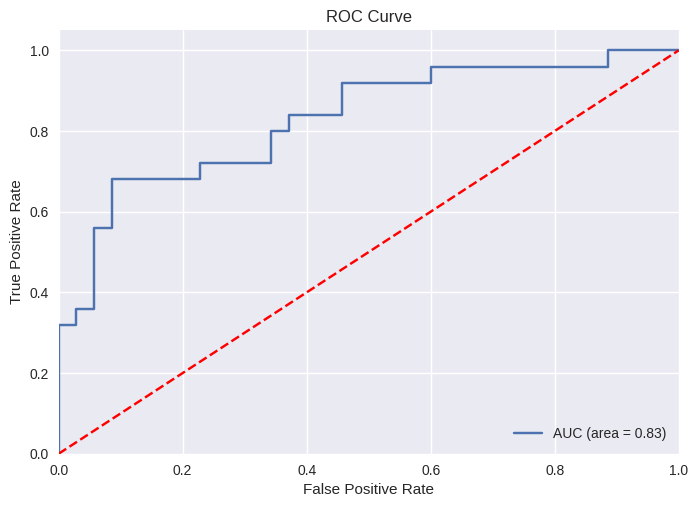

In [79]:
from sklearn.metrics import roc_auc_score, roc_curve

y_pred_proba = best_model.predict_proba(X_test)[:, 1]
# Calcul de l'AUC
auc_rl = roc_auc_score(y_test, y_pred_proba)
# Calcul des taux de faux positifs et de vrais positifs
fpr, tpr, thresholds = roc_curve(y_test, y_pred_proba)

# Tracé de la courbe ROC
plt.figure()
plt.plot(fpr, tpr, label='AUC (area = %0.2f)' % auc_rl)  # Utilisation de auc_rl au lieu de log_roc_auc
plt.plot([0, 1], [0, 1], 'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend(loc='lower right')
plt.show()

In [80]:
import statsmodels.api as sm
# Fiting the logistic regression model
logit_model = sm.Logit(y_train_resampled,X_train_resampled)
result = logit_model.fit()

wald_test = result.wald_test_terms()

# Get the AIC and BIC values
aic = result.aic
bic = result.bic
# Print the summary table
print(result.summary())
print("AIC:", aic)
print("BIC:", bic)

Optimization terminated successfully.
         Current function value: 0.401058
         Iterations 7
                           Logit Regression Results                           
Dep. Variable:            DEATH_EVENT   No. Observations:                  336
Model:                          Logit   Df Residuals:                      330
Method:                           MLE   Df Model:                            5
Date:                Sun, 05 May 2024   Pseudo R-squ.:                  0.4214
Time:                        15:48:24   Log-Likelihood:                -134.76
converged:                       True   LL-Null:                       -232.90
Covariance Type:            nonrobust   LLR p-value:                 1.771e-40
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
x1             0.5282      0.172      3.072      0.002       0.191       0.865
x2            -1.5230      0.


Les variables significatives pour prédire l'événement de décès sont l'âge, le temps, la créatinine sérique et la fraction d'éjection, avec des coefficients significatifs et des valeurs p inférieures à 0,05. En revanche, l'hypertension artérielle et l'anémie n'ont pas montré de significativité statistique.

## **Arbre de decision**

In [142]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt

# Définir les hyperparamètres à régler
param_grid = {
    'criterion': ['gini', 'entropy'],
    'max_depth': [3, 5],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'max_leaf_nodes': [7]  # Limitez le nombre maximal de feuilles si nécessaire

}

# Initialiser le modèle d'arbre de décision
decision_tree = DecisionTreeClassifier(random_state=42)

# Recherche sur grille avec validation croisée
grid_search = GridSearchCV(decision_tree, param_grid, cv=5, scoring='accuracy')
grid_search.fit(X_train_resampled, y_train_resampled)

# Affichage des meilleurs paramètres trouvés
print("Meilleurs paramètres:", grid_search.best_params_)

# Entraîner le modèle avec la meilleure combinaison d'hyperparamètres
best_decision_tree = grid_search.best_estimator_
best_decision_tree.fit(X_train_resampled, y_train_resampled)
# Évaluation du modèle
accuracy_ad = best_decision_tree.score(X_test, y_test)
print("Accuracy du meilleur modèle:", accuracy_ad)



Meilleurs paramètres: {'criterion': 'gini', 'max_depth': 5, 'max_leaf_nodes': 7, 'min_samples_leaf': 4, 'min_samples_split': 2}
Accuracy du meilleur modèle: 0.7833333333333333
AUC du modèle: 0.7731428571428571


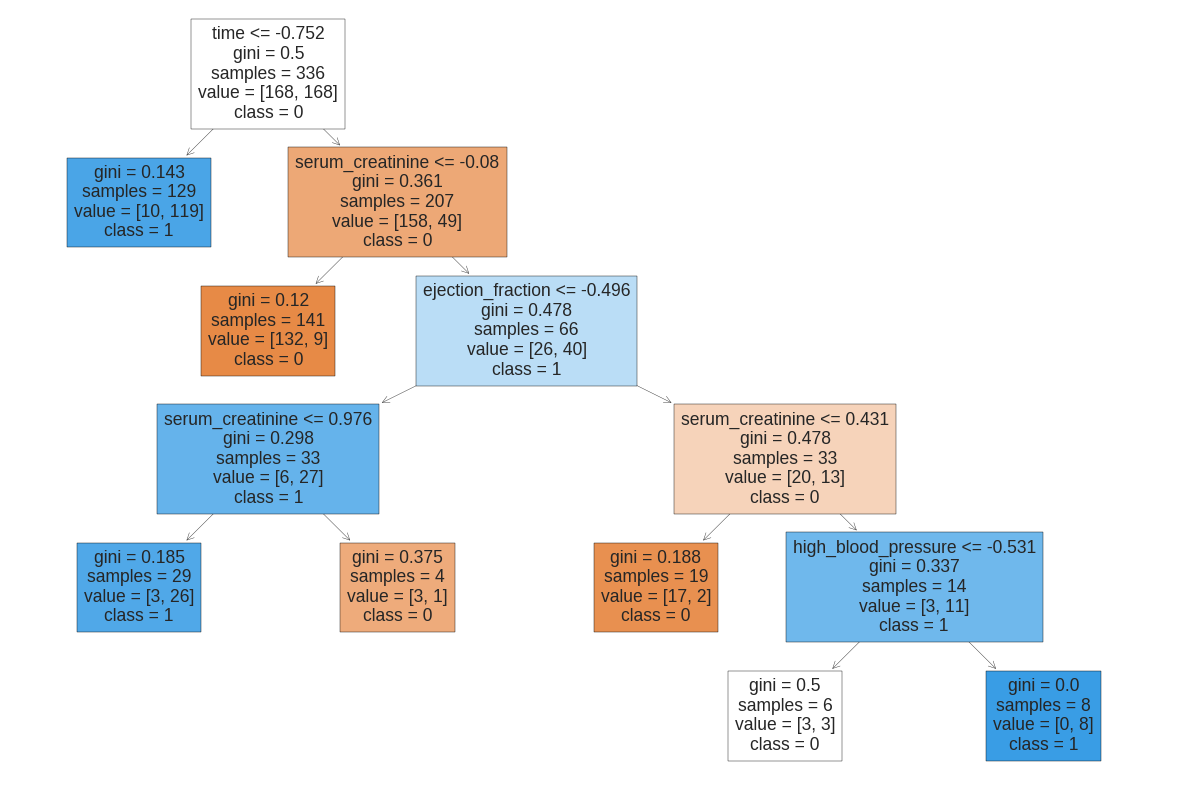

In [96]:
from sklearn.tree import plot_tree

plt.figure(figsize=(15, 10))
plot_tree(best_decision_tree, filled=True, feature_names=X.columns, class_names=['0', '1'])
plt.show()



L'arbre de décision que vous m'avez fourni permet de classifier les patients en fonction de leur risque de développer une maladie cardiaque.

L'indice de Gini est utilisé pour sélectionner la meilleure variable à utiliser pour diviser un nœud dans un arbre de décision.

In [83]:
from sklearn.tree import export_text

tree_rules = export_text(best_decision_tree, feature_names=list(X.columns))
print(tree_rules)


|--- time <= -0.75
|   |--- class: 1
|--- time >  -0.75
|   |--- serum_creatinine <= -0.08
|   |   |--- class: 0
|   |--- serum_creatinine >  -0.08
|   |   |--- ejection_fraction <= -0.50
|   |   |   |--- serum_creatinine <= 0.98
|   |   |   |   |--- class: 1
|   |   |   |--- serum_creatinine >  0.98
|   |   |   |   |--- class: 0
|   |   |--- ejection_fraction >  -0.50
|   |   |   |--- serum_creatinine <= 0.43
|   |   |   |   |--- class: 0
|   |   |   |--- serum_creatinine >  0.43
|   |   |   |   |--- high_blood_pressure <= -0.53
|   |   |   |   |   |--- class: 0
|   |   |   |   |--- high_blood_pressure >  -0.53
|   |   |   |   |   |--- class: 1



In [145]:
from sklearn.metrics import precision_score, recall_score, roc_auc_score,f1_score

# Faire des prédictions sur l'ensemble de test
y_pred_ad = best_decision_tree.predict(X_test)

# Calculer la matrice de confusion
confusion_ad = confusion_matrix(y_test, y_pred_ad)
print("Matrice de confusion:\n", confusion_ad)

# Calculer la précision
precision_ad = precision_score(y_test, y_pred_ad)
print("Précision du modèle:", precision_ad)

# Calculer le rappel
recall_ad = recall_score(y_test, y_pred_ad)
print("Rappel du modèle:", recall_ad)

# Calculer l'AUC
y_pred_proba_ad = best_decision_tree.predict_proba(X_test)[:, 1]
auc_ad = roc_auc_score(y_test, y_pred_proba_ad)
print("AUC du modèle:", auc_ad)

# Calculer le score F1
f1_ad = f1_score(y_test, y_pred_ad)
print("Score F1 du modèle:", f1_ad)


Matrice de confusion:
 [[30  5]
 [ 8 17]]
Précision du modèle: 0.7727272727272727
Rappel du modèle: 0.68
AUC du modèle: 0.7731428571428571
Score F1 du modèle: 0.7234042553191491


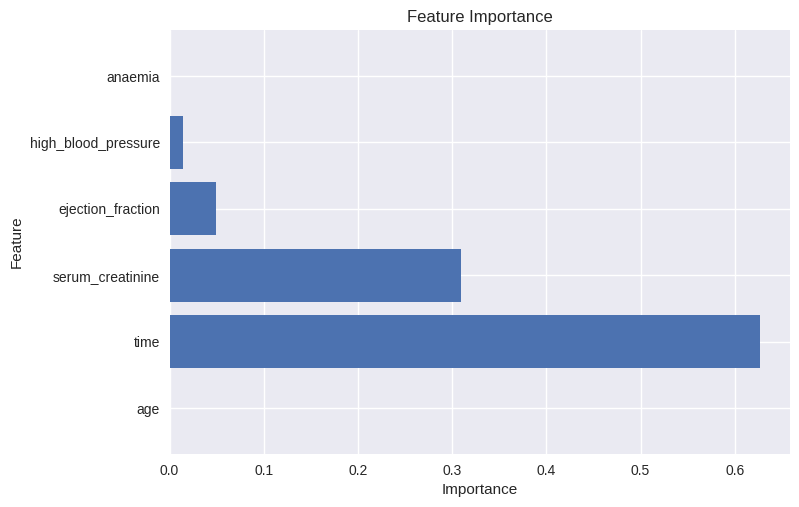

In [154]:
# Affichage de l'importance des features
importances = best_decision_tree.feature_importances_
plt.barh(X.columns, importances)
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.title('Feature Importance')
plt.show()


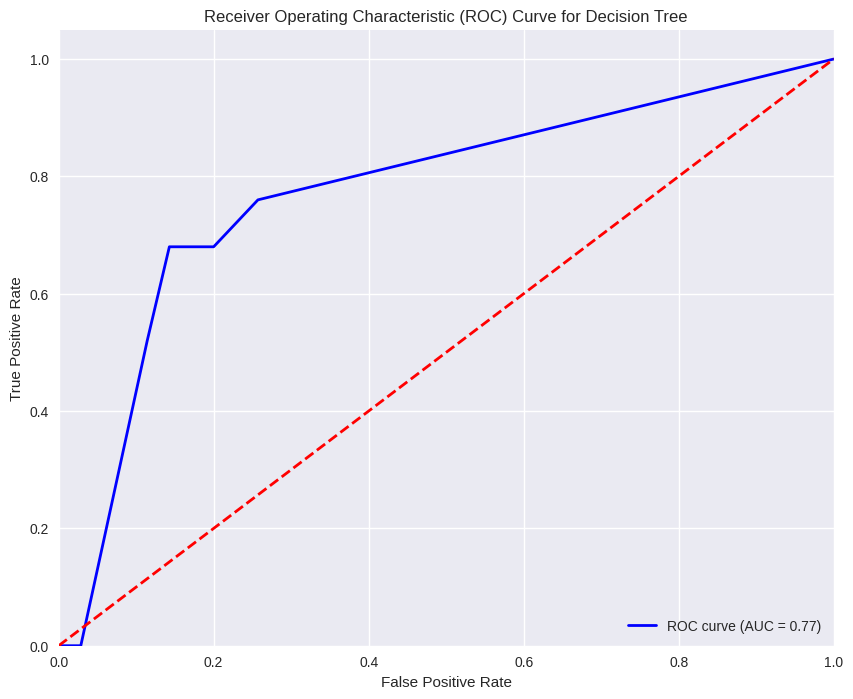

In [86]:
from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt

# Calculer les scores de décision pour l'arbre de décision
y_score_tree = best_decision_tree.predict_proba(X_test)[:, 1]
# Calculer la courbe ROC pour l'arbre de décision
fpr_tree, tpr_tree, thresholds_tree = roc_curve(y_test, y_score_tree)

# Calculer l'aire sous la courbe ROC (AUC) pour l'arbre de décision
roc_auc_tree = auc(fpr_tree, tpr_tree)

# Tracer la courbe ROC pour l'arbre de décision
plt.figure(figsize=(10, 8))
plt.plot(fpr_tree, tpr_tree, color='blue', lw=2, label='ROC curve (AUC = %0.2f)' % roc_auc_tree)
plt.plot([0, 1], [0, 1], color='red', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve for Decision Tree')
plt.legend(loc="lower right")
plt.show()

**interprétation**
L'AUC de la courbe ROC mesure la capacité du modèle à distinguer entre les classes en fonction des scores de probabilité qu'il génère. Une valeur élevée d'AUC, comme 80 %, indique que le modèle classe correctement les exemples positifs plus haut que les exemples négatifs dans la plupart des cas. Cela signifie que le modèle est plutôt bon pour séparer les deux classes.

 D'autre part, l'accuracy mesure simplement la proportion d'observations correctement classées par le modèle. Une accuracy de 78 % signifie que 78 % des prédictions du modèle sont correctes par rapport à l'ensemble de test utilisé.

## **RandomForest**

In [140]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV
import matplotlib.pyplot as plt

# Définir les hyperparamètres à régler
param_grid = {
    'n_estimators': [50, 100, 200],
    'criterion': ['gini', 'entropy'],
    'max_depth': [3,5],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

# Initialiser le modèle Random Forest
random_forest = RandomForestClassifier(random_state=3)

# Recherche sur grille avec validation croisée
grid_search1 = GridSearchCV(random_forest, param_grid, cv=5, scoring='accuracy')
grid_search1.fit(X_train_resampled, y_train_resampled)

# Affichage des meilleurs paramètres trouvés
print("Meilleurs paramètres:", grid_search1.best_params_)

# Entraîner le modèle avec la meilleure combinaison d'hyperparamètres
best_random_forest = grid_search1.best_estimator_
best_random_forest.fit(X_train_resampled, y_train_resampled)

# Évaluation du modèle
accuracy_rf = best_random_forest.score(X_test, y_test)
print("Accuracy du meilleur modèle:", accuracy_rf)


Meilleurs paramètres: {'criterion': 'gini', 'max_depth': 5, 'min_samples_leaf': 4, 'min_samples_split': 2, 'n_estimators': 100}
Accuracy du meilleur modèle: 0.75


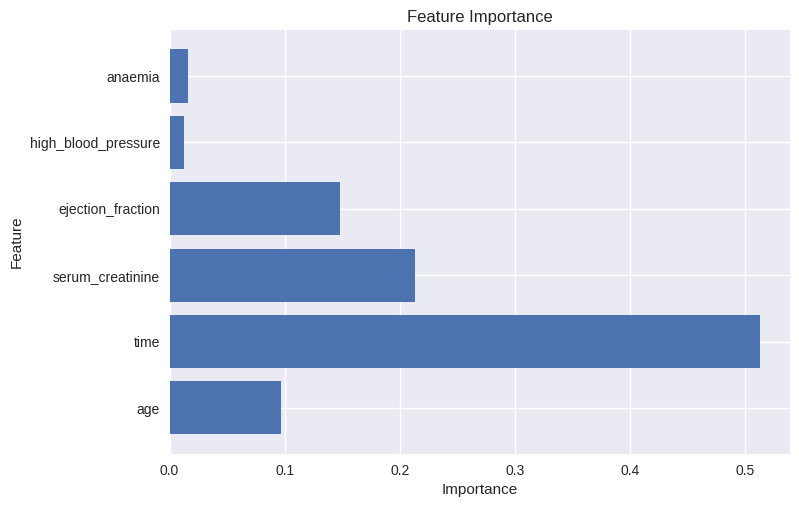

In [88]:
# Affichage de l'importance des features
importances = best_random_forest.feature_importances_
plt.barh(X.columns, importances)
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.title('Feature Importance')
plt.show()

In [144]:
from sklearn.metrics import precision_score, recall_score, roc_auc_score, confusion_matrix

# Faire des prédictions sur l'ensemble de test avec RandomForestClassifier
y_pred_rf = best_random_forest.predict(X_test)

# Calculer la matrice de confusion
confusion_rf = confusion_matrix(y_test, y_pred_rf)
print("Matrice de confusion:\n", confusion_rf)

# Calculer la précision
precision_rf = precision_score(y_test, y_pred_rf)
print("Précision du modèle RandomForestClassifier:", precision_rf)

# Calculer le rappel
recall_rf = recall_score(y_test, y_pred_rf)
print("Rappel du modèle RandomForestClassifier:", recall_rf)

# Calculer l'AUC
y_pred_proba_rf = best_random_forest.predict_proba(X_test)[:, 1]
auc_rf = roc_auc_score(y_test, y_pred_proba_rf)
print("AUC du modèle RandomForestClassifier:", auc_rf)

from sklearn.metrics import f1_score

# Calcul du score F1
f1_rf = f1_score(y_test, y_pred_rf)
print("Score F1 du modèle RandomForestClassifier:", f1_rf)


Matrice de confusion:
 [[28  7]
 [ 8 17]]
Précision du modèle RandomForestClassifier: 0.7083333333333334
Rappel du modèle RandomForestClassifier: 0.68
AUC du modèle RandomForestClassifier: 0.8445714285714285
Score F1 du modèle RandomForestClassifier: 0.6938775510204083


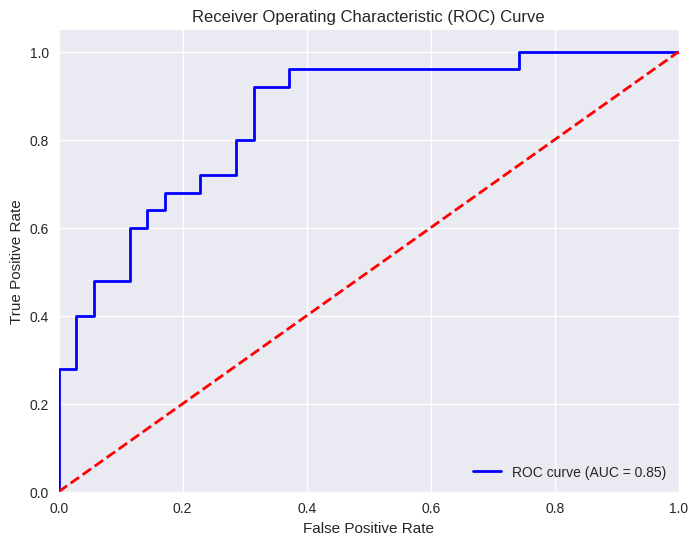

In [91]:
from sklearn.metrics import roc_curve, auc

# Calculer les probabilités prédites pour chaque classe
y_proba = best_random_forest.predict_proba(X_test)
y_proba_positive = y_proba[:, 1]  # Probabilités de la classe positive

# Calculer la courbe ROC
fpr, tpr, thresholds = roc_curve(y_test, y_proba_positive)

# Calculer l'aire sous la courbe ROC (AUC)
roc_auc = auc(fpr, tpr)

# Tracer la courbe ROC
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='blue', lw=2, label='ROC curve (AUC = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='red', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc="lower right")
plt.show()


**interprétation**

Dans ce cas, un AUC de 0,84 suggère que le modèle Random Forest a une capacité relativement forte à classer correctement les observations dans les classes positives et négatives. C'est une mesure importante de la performance du modèle, notamment dans les problèmes de classification binaire comme celui-ci.

In [147]:
import pandas as pd
from tabulate import tabulate

# Création du DataFrame avec les résultats des modèles
data = {
    'Model': ['Logistic Regression', 'Decision Tree', 'Random Forest'],
    'Accuracy': [accuracy_rl, accuracy_ad, accuracy_rf],
    'Precision': [precision_rl, precision_ad, precision_rf],
    'Recall': [recall_rl, recall_ad, recall_rf],
    'AUC': [auc_rl, auc_ad, auc_rf],
    'F1SCORE' :[f1_rl, f1_ad, f1_rf]
}

# Création du DataFrame
df = pd.DataFrame(data)

# Affichage du tableau
print(tabulate(df, headers='keys', tablefmt='fancy_grid', showindex=False))



╒═════════════════════╤════════════╤═════════════╤══════════╤══════════╤═══════════╕
│ Model               │   Accuracy │   Precision │   Recall │      AUC │   F1SCORE │
╞═════════════════════╪════════════╪═════════════╪══════════╪══════════╪═══════════╡
│ Logistic Regression │   0.766667 │    0.73913  │     0.68 │ 0.829714 │  0.708333 │
├─────────────────────┼────────────┼─────────────┼──────────┼──────────┼───────────┤
│ Decision Tree       │   0.783333 │    0.772727 │     0.68 │ 0.773143 │  0.723404 │
├─────────────────────┼────────────┼─────────────┼──────────┼──────────┼───────────┤
│ Random Forest       │   0.75     │    0.708333 │     0.68 │ 0.844571 │  0.693878 │
╘═════════════════════╧════════════╧═════════════╧══════════╧══════════╧═══════════╛


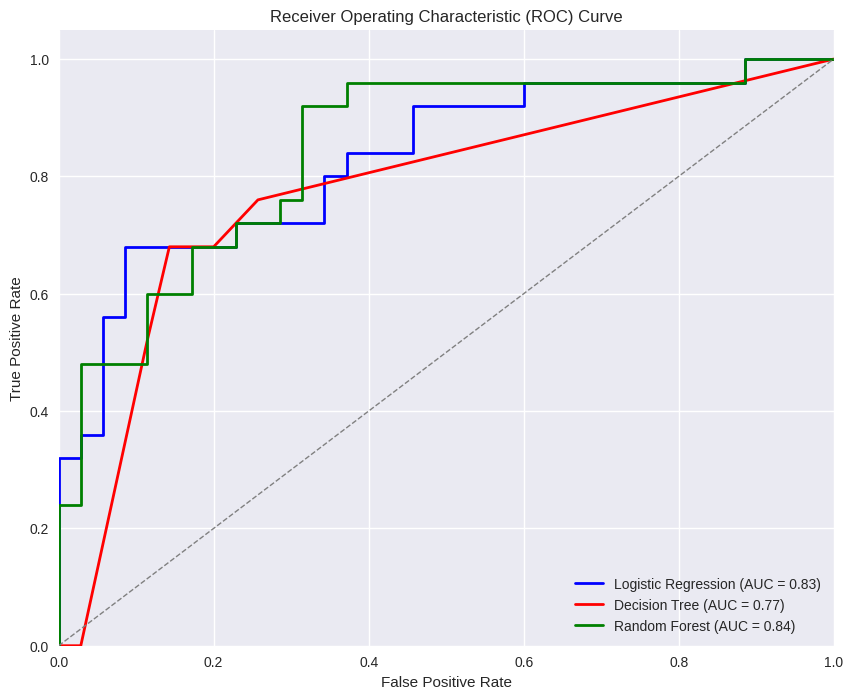

╒═════════════════════╤════════════╤═════════════╤══════════╤══════════╤═══════════╕
│ Model               │   Accuracy │   Precision │   Recall │      AUC │   F1SCORE │
╞═════════════════════╪════════════╪═════════════╪══════════╪══════════╪═══════════╡
│ Logistic Regression │   0.766667 │    0.73913  │     0.68 │ 0.829714 │  0.708333 │
├─────────────────────┼────────────┼─────────────┼──────────┼──────────┼───────────┤
│ Decision Tree       │   0.783333 │    0.772727 │     0.68 │ 0.773143 │  0.723404 │
├─────────────────────┼────────────┼─────────────┼──────────┼──────────┼───────────┤
│ Random Forest       │   0.75     │    0.708333 │     0.68 │ 0.844571 │  0.693878 │
╘═════════════════════╧════════════╧═════════════╧══════════╧══════════╧═══════════╛


In [153]:
import pandas as pd
from tabulate import tabulate
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, auc

# Calculer les courbes ROC pour chaque modèle
fpr_rl, tpr_rl, _ = roc_curve(y_test, y_pred_proba_rl)
fpr_ad, tpr_ad, _ = roc_curve(y_test, y_pred_proba_ad)
fpr_rf, tpr_rf, _ = roc_curve(y_test, y_pred_proba_rf)

# Calculer l'AUC pour chaque modèle
roc_auc_rl = auc(fpr_rl, tpr_rl)
roc_auc_ad = auc(fpr_ad, tpr_ad)
roc_auc_rf = auc(fpr_rf, tpr_rf)

# Tracer les courbes ROC
plt.figure(figsize=(10, 8))
plt.plot(fpr_rl, tpr_rl, color='blue', lw=2, label=f'Logistic Regression (AUC = {roc_auc_rl:.2f})')
plt.plot(fpr_ad, tpr_ad, color='red', lw=2, label=f'Decision Tree (AUC = {roc_auc_ad:.2f})')
plt.plot(fpr_rf, tpr_rf, color='green', lw=2, label=f'Random Forest (AUC = {roc_auc_rf:.2f})')
plt.plot([0, 1], [0, 1], color='gray', lw=1, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.grid(True)
plt.show()

# Création du DataFrame avec les résultats des modèles
data = {
    'Model': ['Logistic Regression', 'Decision Tree', 'Random Forest'],
    'Accuracy': [accuracy_rl, accuracy_ad, accuracy_rf],
    'Precision': [precision_rl, precision_ad, precision_rf],
    'Recall': [recall_rl, recall_ad, recall_rf],
    'AUC': [auc_rl, auc_ad, auc_rf],
    'F1SCORE' :[f1_rl, f1_ad, f1_rf]
}

# Création du DataFrame
df = pd.DataFrame(data)

# Affichage du tableau
print(tabulate(df, headers='keys', tablefmt='fancy_grid', showindex=False))


La Forêt Aléatoire obtient la meilleure AUC, indiquant une meilleure capacité à distinguer les classes positives et négatives. L'Arbre de Décision a le meilleur F1 Score, suggérant un équilibre entre la précision et le rappel. La Régression Logistique a une précision légèrement supérieure mais une AUC légèrement inférieure aux autres modèles.
Ce tableau présente les performances de trois modèles de classification (Régression Logistique, Arbre de Décision, Forêt Aléatoire) pour prédire la mortalité cardiaque. Malgré des différences mineures entre les performances de chaque modèle, tous donnent des résultats assez proches. Cependant, en considérant à la fois la précision et le rappel, l'Arbre de Décision semble offrir le meilleur équilibre entre ces métriques, comme en témoigne son F1 Score supérieur. Par conséquent, nous choisissons le modèle de l'Arbre de Décision comme étant le meilleur pour notre tâche de prédiction de la mortalité cardiaque.

# **Conclusion**

Grâce à des modèles d'apprentissage automatique tels que la régression logistique, l'arbre de décision et la forêt aléatoire, nous avons pu prédire avec précision l'insuffisance cardiaque chez les patients. Ces modèles identifient des facteurs clés tels que l'âge, la pression artérielle et d'autres marqueurs de santé pour évaluer le risque de cette condition. En intervenant précocement chez les patients à risque, ces prédictions peuvent aider à améliorer les résultats cliniques et à sauver des vies.